In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error
from pandasql import sqldf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Import

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
print(df.shape)
df.head()

(800, 13)


,index_name,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [4]:
df.columns

Index(['index_name', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'total_power'],
      dtype='object')

# Data Cleaning

In [5]:
df = df.set_index('Name')
df = df.drop(['index_name'],axis=1)

In [6]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


# Exploratory Data Analysis

<Axes: xlabel='Type 1', ylabel='total_power'>

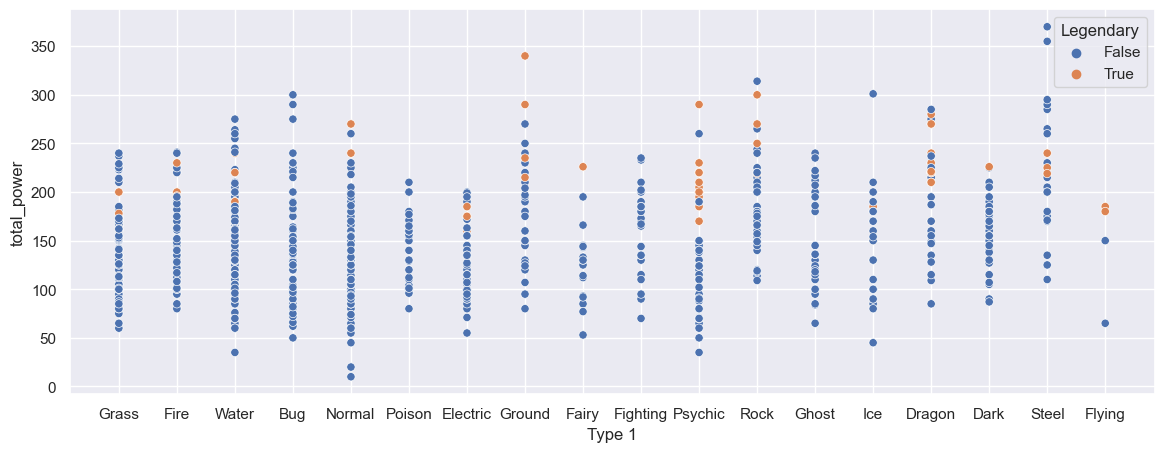

In [7]:
sns.set_theme(rc={'figure.figsize':(14 ,5)})
sns.scatterplot(df, x = 'Type 1', y= 'total_power', hue ='Legendary')

<Axes: xlabel='Type 2', ylabel='total_power'>

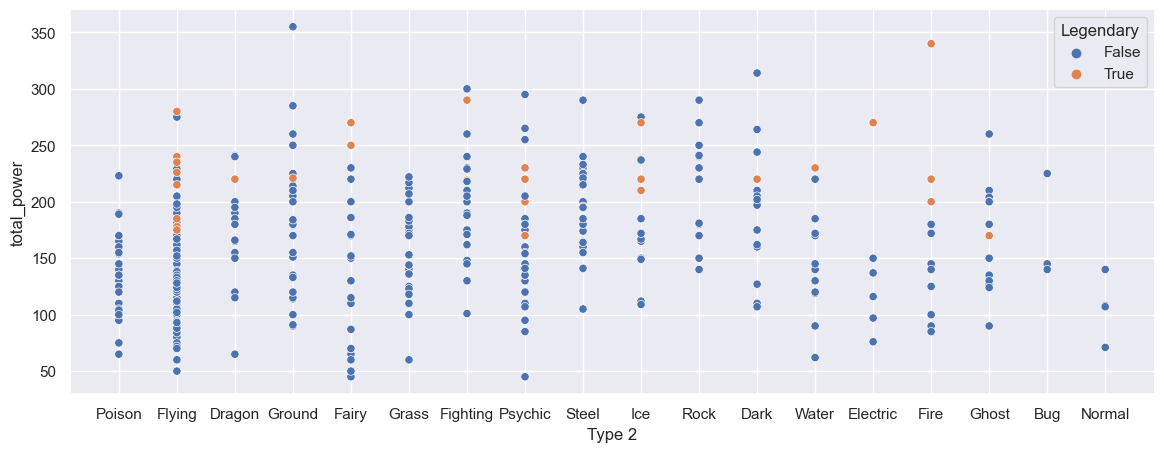

In [8]:
sns.set_theme(rc={'figure.figsize':(14 ,5)})
sns.scatterplot(df, x = 'Type 2', y= 'total_power', hue ='Legendary')

In [9]:
sqldf(' select * from df where [type 2] = "Ground" and total_power > 350')

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
0,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,0,355


In [10]:
sqldf(' select * from df where [type 2] = "Fire" and total_power >= 200')

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
0,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,1,340
1,Victini,Psychic,Fire,100,100,100,100,100,100,5,1,200
2,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,1,220


In [11]:
aggregates = df.groupby(['Legendary','Type 1']).mean(numeric_only=True)

<Axes: xlabel='Type 1', ylabel='total_power'>

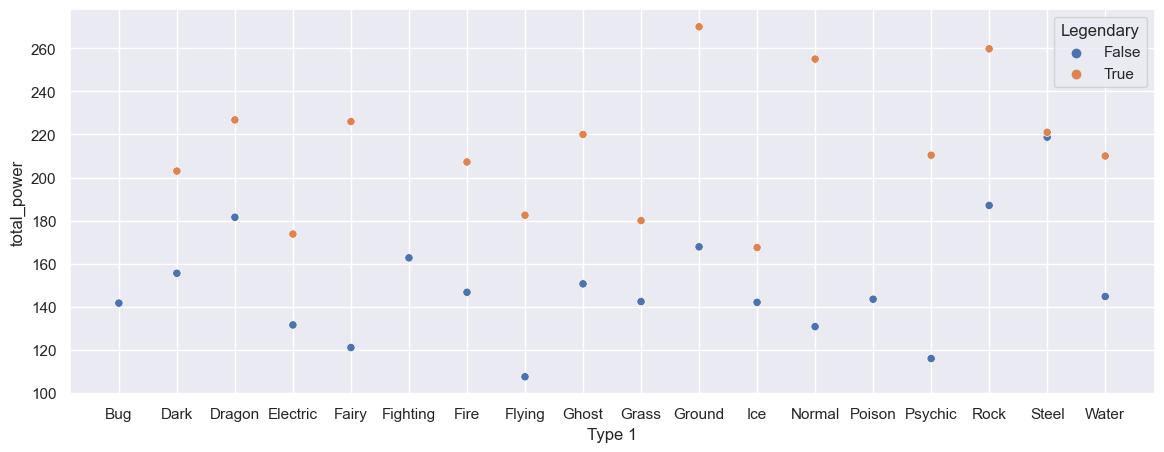

In [12]:
sns.scatterplot(aggregates, x = 'Type 1', y= 'total_power', hue ='Legendary')

In [13]:
aggregates.head()

HP      Attack    Defense    Sp. Atk    Sp. Def  \
Legendary Type 1                                                             
False     Bug       56.884058   70.971014  70.724638  53.869565  64.797101   
          Dark      64.655172   86.862069  68.689655  70.620690  67.827586   
          Dragon    72.650000  103.400000  78.150000  72.900000  77.400000   
          Electric  57.325000   66.125000  65.425000  86.275000  72.325000   
          Fairy     70.875000   57.187500  63.875000  75.250000  83.875000   

                        Speed  Generation  total_power  
Legendary Type 1                                        
False     Bug       61.681159    3.217391   141.695652  
          Dark      73.689655    3.965517   155.551724  
          Dragon    72.350000    3.750000   181.550000  
          Electric  82.275000    3.275000   131.550000  
          Fairy     45.437500    4.000000   121.062500

<Axes: >

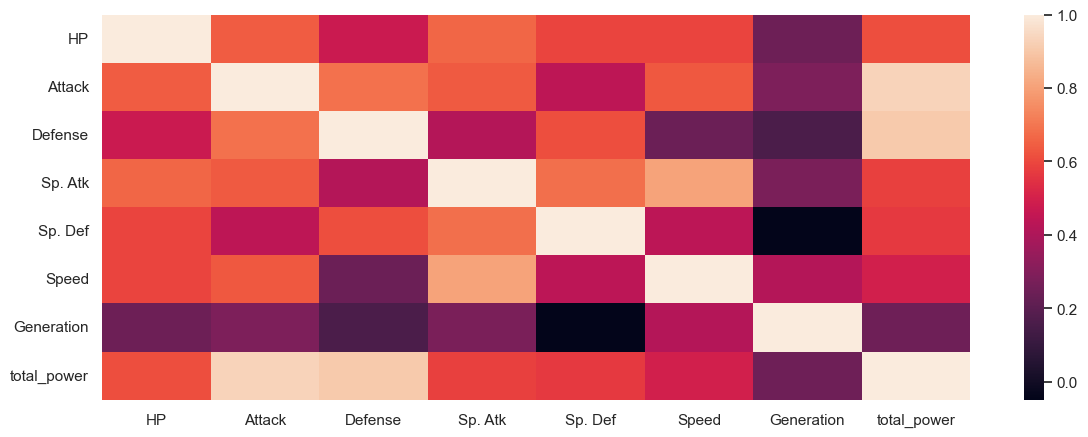

In [14]:
sns.heatmap(aggregates.corr())

Text(0.5, 1.0, 'Attack vs Total Power')

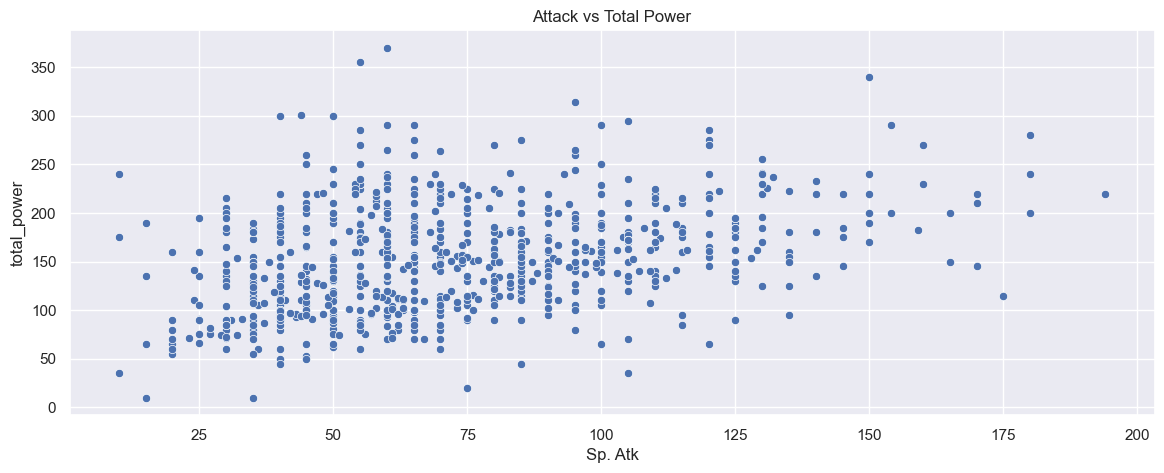

In [15]:
ax = sns.scatterplot(df,x='Sp. Atk',y='total_power')
ax.set_title('Attack vs Total Power')

In [16]:
df.columns

Index(['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'total_power'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4633b0250>,
 'caps': [<matplotlib.lines.Line2D at 0x1a4630681d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a462fdf210>],
 'medians': [<matplotlib.lines.Line2D at 0x1a463069790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a46306a150>],
 'means': []}

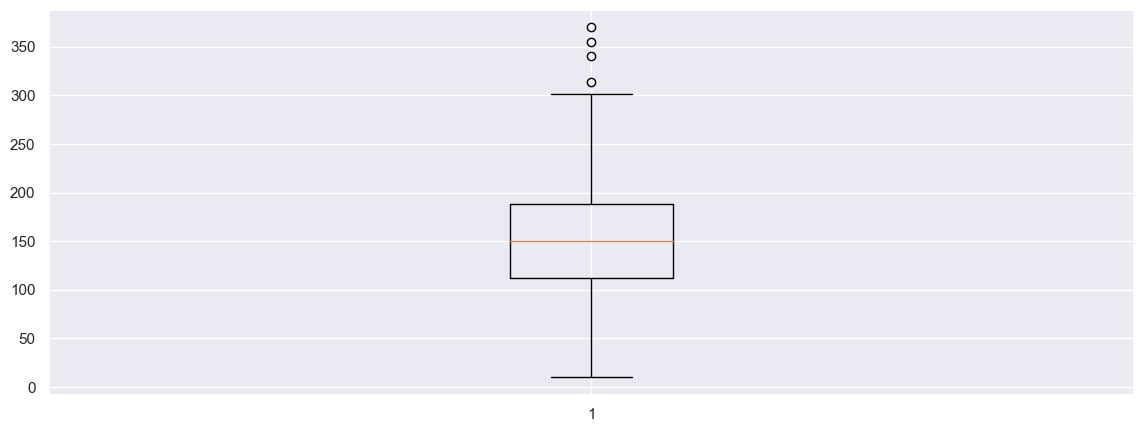

In [17]:
plt.boxplot(df['total_power'])

In [18]:
sqldf(' select * from df  where total_power >= 300')

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
0,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,0,355
1,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,0,300
2,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,0,314
3,Mega Aggron,Steel,None,70,140,230,60,80,50,3,0,370
4,Regirock,Rock,None,80,100,200,50,100,50,3,1,300
5,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,1,340
6,Avalugg,Ice,None,95,117,184,44,46,28,6,0,301


Text(0.5, 1.0, 'Legendary')

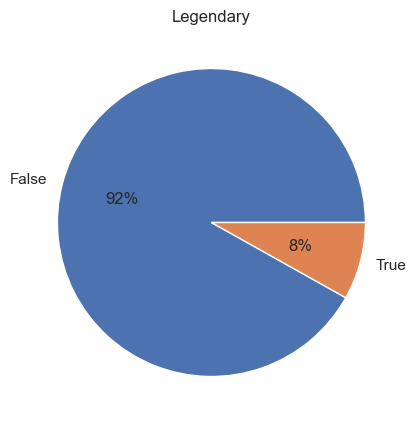

In [19]:
ax = df.groupby(['Legendary']).size().plot(kind = 'pie',autopct='%1.0f%%')
ax.set_title('Legendary')


Text(0.5, 1.0, 'Generation')

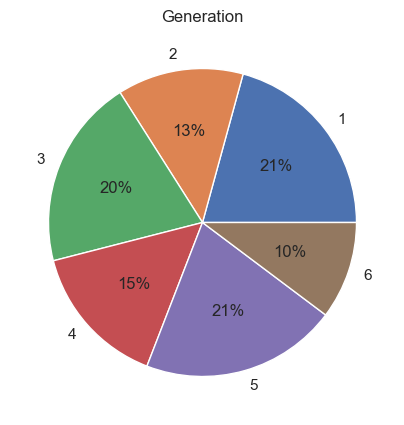

In [20]:
ax = df.groupby(['Generation']).size().plot(kind = 'pie',autopct='%1.0f%%')
ax.set_title('Generation')

In [21]:
aggregates = df.groupby(['Generation']).mean(numeric_only=True)

Text(0.5, 1.0, 'Generational Power')

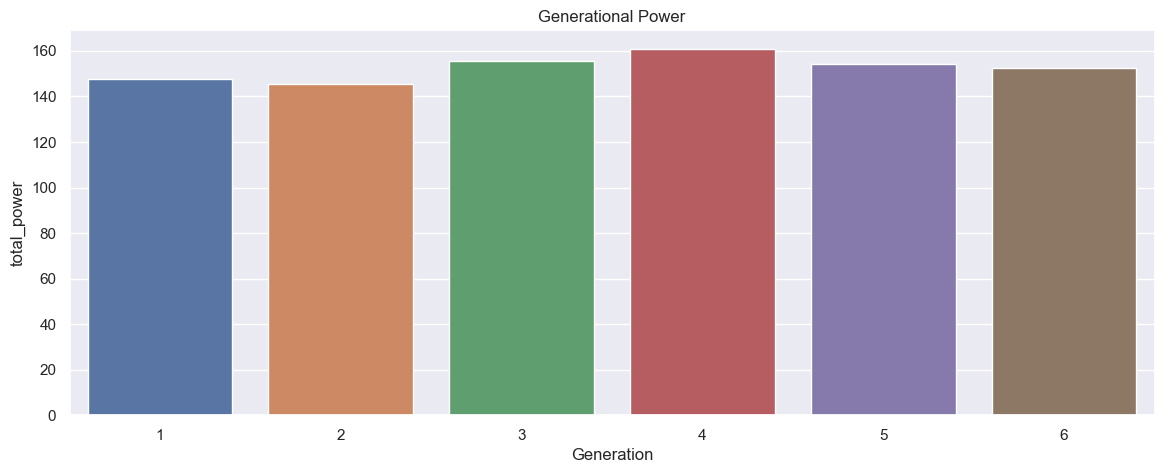

In [22]:
ax = sns.barplot(aggregates, x = aggregates.index, y= 'total_power')
ax.set_title('Generational Power')

# Pre-processing

In [23]:
df.columns

Index(['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'total_power'],
      dtype='object')

In [24]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [25]:
# Create a LabelEncoder
le = LabelEncoder()

# Fit the encoder to learn the mapping
le.fit(df['Type 1'])
le.fit(df['Type 2'])
le.fit(df['Legendary'])


LabelEncoder()

In [26]:
#perform label encoding on col1, col2 columns
df[['Type 1','Type 2','Legendary']] = df[['Type 1', 'Type 2','Legendary']].apply(LabelEncoder().fit_transform)

In [27]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
Name,,,,,,,,,,,
Bulbasaur,9,13,45,49,49,65,65,45,1,0,98
Ivysaur,9,13,60,62,63,80,80,60,1,0,125
Venusaur,9,13,80,82,83,100,100,80,1,0,165
Mega Venusaur,9,13,80,100,123,122,120,80,1,0,223
Charmander,6,18,39,52,43,60,50,65,1,0,95


In [28]:
dict(zip(le.classes_, le.transform(le.classes_)))

{False: 0, True: 1}

# KMeans (Unsupervised)

Text(0, 0.5, 'Inertia')

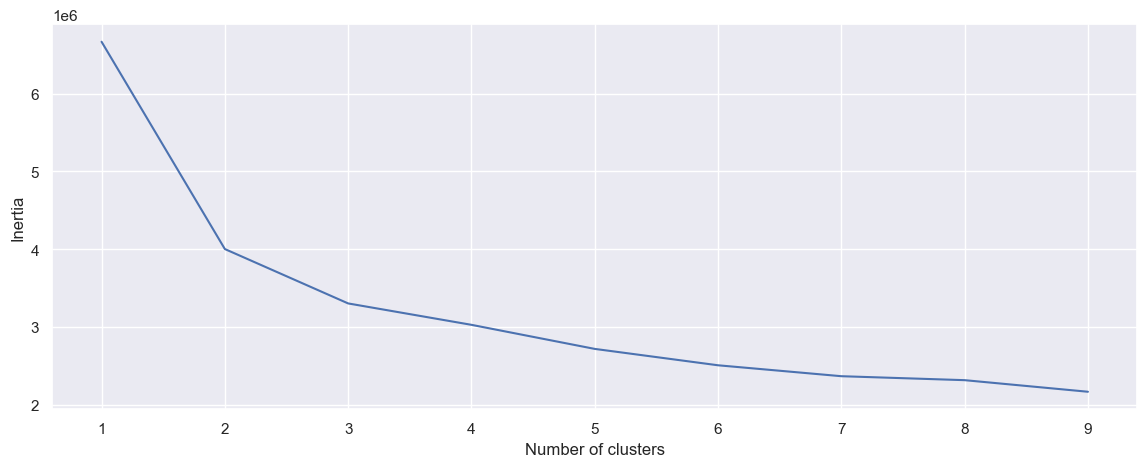

In [29]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,init='k-means++', max_iter = 300, n_init='auto', random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [30]:

#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
labels = kmeans.labels_

#Glue back to originaal data
df['clusters'] = labels


c:\Users\pbv01\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


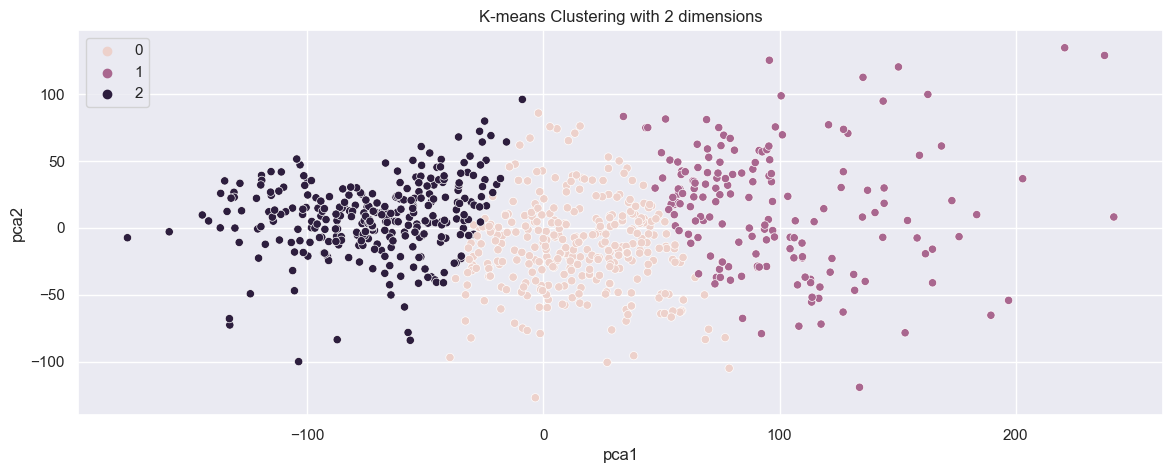

In [31]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=kmeans.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<Axes: >

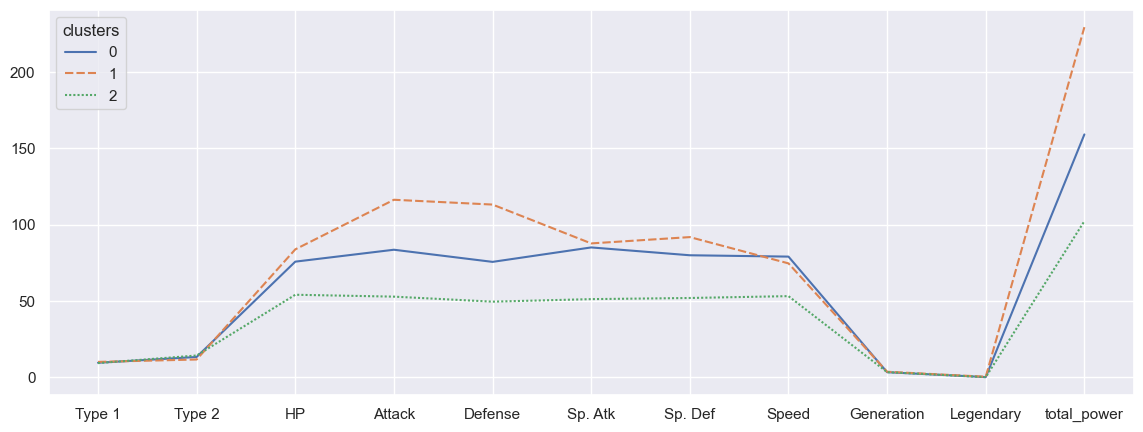

In [32]:
sns.lineplot(df.groupby('clusters').mean().transpose())

In [33]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power,clusters
Name,,,,,,,,,,,,
Bulbasaur,9,13,45,49,49,65,65,45,1,0,98,2
Ivysaur,9,13,60,62,63,80,80,60,1,0,125,0
Venusaur,9,13,80,82,83,100,100,80,1,0,165,0
Mega Venusaur,9,13,80,100,123,122,120,80,1,0,223,1
Charmander,6,18,39,52,43,60,50,65,1,0,95,2


In [34]:
df.columns

Index(['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'total_power', 'clusters'],
      dtype='object')

# Linear Regression (Supervised)

In [35]:
X = df.drop(['total_power'],axis=1)
#X= df[['Attack']]
y = df['total_power']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
reg = linear_model.LinearRegression()

In [38]:
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = reg.predict(X_test)

In [40]:
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred)*100)

3.98999534973546e-27
6.316640997979432e-14
100.0


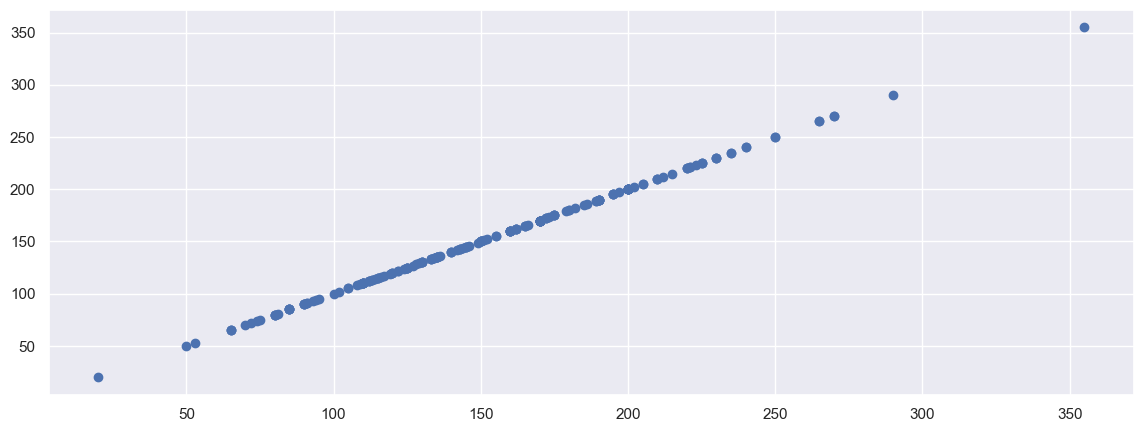

In [41]:
plt.scatter(y_test,y_pred)

# Logistic Regression (Supervised)

In [42]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power,clusters
Name,,,,,,,,,,,,
Bulbasaur,9,13,45,49,49,65,65,45,1,0,98,2
Ivysaur,9,13,60,62,63,80,80,60,1,0,125,0
Venusaur,9,13,80,82,83,100,100,80,1,0,165,0
Mega Venusaur,9,13,80,100,123,122,120,80,1,0,223,1
Charmander,6,18,39,52,43,60,50,65,1,0,95,2


In [43]:
X = df.drop(['Legendary'],axis=1)
y = df['Legendary']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [45]:
# LogisticRegression
clf = LogisticRegression(max_iter=1000)
#clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
# Prediction
y_pred = clf.predict(X_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 92.5


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       186
           1       0.47      0.50      0.48        14

    accuracy                           0.93       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.93      0.93      0.93       200



In [49]:
print(confusion_matrix(y_test, y_pred))

[[178   8]
 [  7   7]]


# BONUS - Decision Trees (Supervised)

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       186
           1       1.00      0.21      0.35        14

    accuracy                           0.94       200
   macro avg       0.97      0.61      0.66       200
weighted avg       0.95      0.94      0.93       200



In [52]:
print(confusion_matrix(y_test, y_pred))

[[186   0]
 [ 11   3]]


[Text(0.5, 0.875, 'Sp. Atk <= 147.5\ngini = 0.156\nsamples = 600\nvalue = [549, 51]\nclass = 0'),
 Text(0.25, 0.625, 'total_power <= 177.5\ngini = 0.116\nsamples = 580\nvalue = [544, 36]\nclass = 0'),
 Text(0.125, 0.375, 'Sp. Def <= 175.0\ngini = 0.015\nsamples = 404\nvalue = [401, 3]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.01\nsamples = 403\nvalue = [401, 2]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.375, 0.375, 'Speed <= 89.0\ngini = 0.305\nsamples = 176\nvalue = [143, 33]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.099\nsamples = 115\nvalue = [109, 6]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.493\nsamples = 61\nvalue = [34, 27]\nclass = 0'),
 Text(0.75, 0.625, 'Attack <= 107.0\ngini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = 1'),
 Text(0.625, 0.375, 'HP <= 95.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.6875, 0.125, 'gi

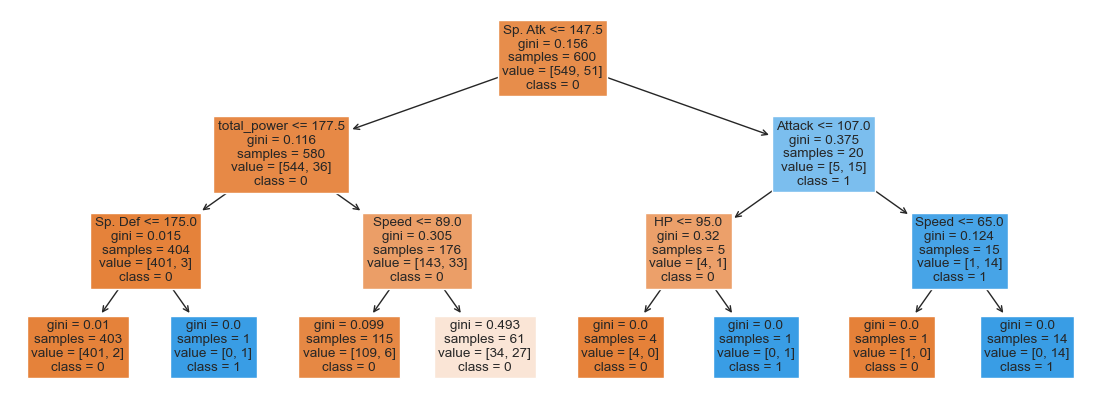

In [53]:
tree.plot_tree(clf,
               feature_names = list(X.columns), 
               class_names= list(y.drop_duplicates().values.astype(str)),
               filled = True)